![alt text](img/LM.png)
# Kurs: Deep Learning, Text Mining i XAI w Pythonie

## Autor: Piotr Ćwiakowski

### Lekcja 8. Sieci MLP - ćwiczenia

## Zadanie 1. 
Wytrenuj sieć neuronową (korzystając z gotowych funkcji), która prognozuje fraudy na kartach kredytowych.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/creditcard.csv.zip')
print(df.shape)
df.head()

print(df['Class'].value_counts())


features = df.columns.tolist()
features.remove('Class')
target = 'Class'

a) przygotuj zbiór (standarazycja zmiennych) i wczytaj potrzebne obiekty do stworzenia sieci MLP.

b) wczytaj wrappery do budowy sieci w pakiecie keras, wykonaj "pierwsze uruchomienie" i przeanalizuj historię uczenia.

c) przejrzyj najważniejsze hiperparametry sieci.

d) dla kilku wybranych modeli przeprowadź walidację krzyżową.

## Zadanie 2.

a) Wczytaj dane MNIST.

In [18]:
# Wczytanie danych
from keras.datasets import mnist
from keras.utils.all_utils import to_categorical 
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

b) przeanalizuj zmienną objaśnianą i wyświetl kilka przykładowych obrazów.

In [14]:
# Rozkład poszczególnych kategorii w zbiorze treningowym i testowy.
unique, counts = np.unique(y_train, return_counts=True)
unique, counts = np.unique(y_test, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


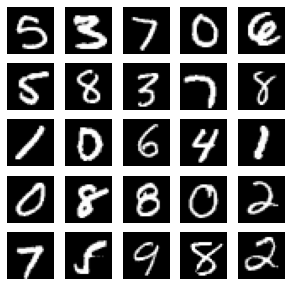

In [15]:
# Wylosowanie 25 obserwacji
ind = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[ind]

# Wygenerowanie obrazów
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

c) Przygotuj zbiór do budowy sieci MLP do zadania klasyfikacji wielotykietowej:

In [19]:
# Policzmy liczbę kategorii
num_labels = len(np.unique(y_train))

# Zmienna objaśniana musi być w formacie one-hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [21]:
# Zbiór X jest tensorem 2D, trzeba go spłaszczyć:

# Wymiary obrazu:
input_size = x_train.shape[1] * x_train.shape[1]

# Zmiana kształtu i normalizacja
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

c) zbuduj (od podstaw, bez walidacji krzyżowej) sieć MLP która wykrywa/prognozuje cyfry ze zbioru MNIST o następującej architekturze:
* warstwę głęboką z 512 neuronami i aktywacją "relu" (`Dense`),
* warstwę dropout z 20% drop rate (`Dropout`),
* warstwę głęboką z 512 neuronami i aktywacją "relu" (`Dense`),
* warstwę dropout z 20% drop rate (`Dropout`),
* warstwę głęboką będącą outputem (ile neuronów i jakiej aktywacji powinieneś użyć?).

c) Skompiluj model używając SGD jako optimizera, wybierz odpowiednią funkcję straty. Dodatkowo pokaż "accuracy" jako metrykę.

d) Dopasuj model. Użyj 20% zbioru do walidacji. Trenuj model przez 20 epok z batch'em wielkości 128 obserwacji.

e) Ewaluacja na zbiorze testowym i oblicz predykcję dla zbioru testowego (przetestuj funkcje `evaluate` - nie było jej na zajęcia, poszukaj w Internecie przykładów jej wykorzystania - np. w dokumentacji pakietu keras).